# Primer Punto:

(20%) Implemente una función que dado un vector X y un número de vecinos K, sea capaz de calcular la distancia euclidiana del vector a todos los puntos del espacio de representación y retornar al usuario la posición de los N puntos más cercanos. (Haga uso de la base de datos iris para corroborar el funcionamiento de su función.)

Con la línea de código from main import * se pueden usar todos los recursos existentes en el archivo de main.py en el modelo del archivo Laboratorio_I.ipynb; Todo lo anterior con la finalidad de tener un código más legible y mejor gestión de la memoria.

In [19]:
from main import *

#Importar la base de datos:
iris_ds = datasets.load_iris()

#Reconocimiento de la base de datos:
print(f'Tamaño de la matriz {iris_ds.data.shape},'
      f' Categorías {iris_ds.target_names},'
      f' Atributos {iris_ds.feature_names}')

#Conversión a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris_ds['data'], iris_ds['target']],
                       columns=iris_ds['feature_names']+['Especies'])
iris_df.head(10)

Tamaño de la matriz (150, 4), Categorías ['setosa' 'versicolor' 'virginica'], Atributos ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especies
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Para el contexto de esta base de datos es necesario entender que el sepal o sépalo de una flor es la cápsula inicial que protege los demás elementos de la flor antes de que esta florezca, del mismo modo también está el pétalo, que forma la corola de la flor (las hojas con colores bonitos y llamativos característicos de cualquier flor).

![Partes de una flor (las que nos interesan)](https://i.ytimg.com/vi/GYBko-B13hY/maxresdefault.jpg)

# Exploración inicial de datos:
Para esta sección lo que se hace es hacer una revisión tanto gráfica como analítica de los elementos que están relacionados en la base de datos

Para el scope de este primer punto solo necesitaremos 2 características del DataFrame, se elegirán Virginica y Versicolor

# Exploración inicial de datos:
Para esta sección lo que se hace es hacer una revisión tanto gráfica como analítica de los elementos que están relacionados en la base de datos

In [20]:
#Descripción de los datos en iris_df:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


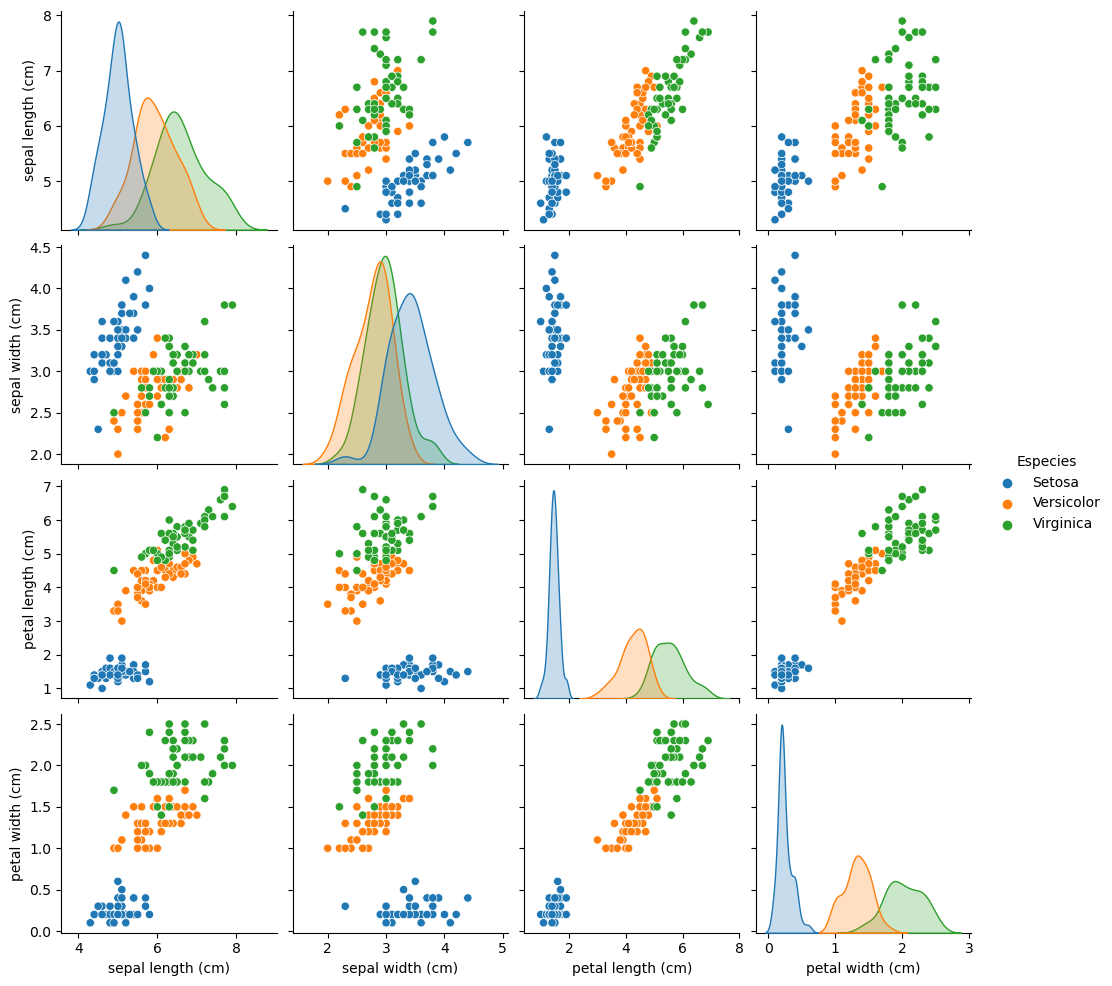

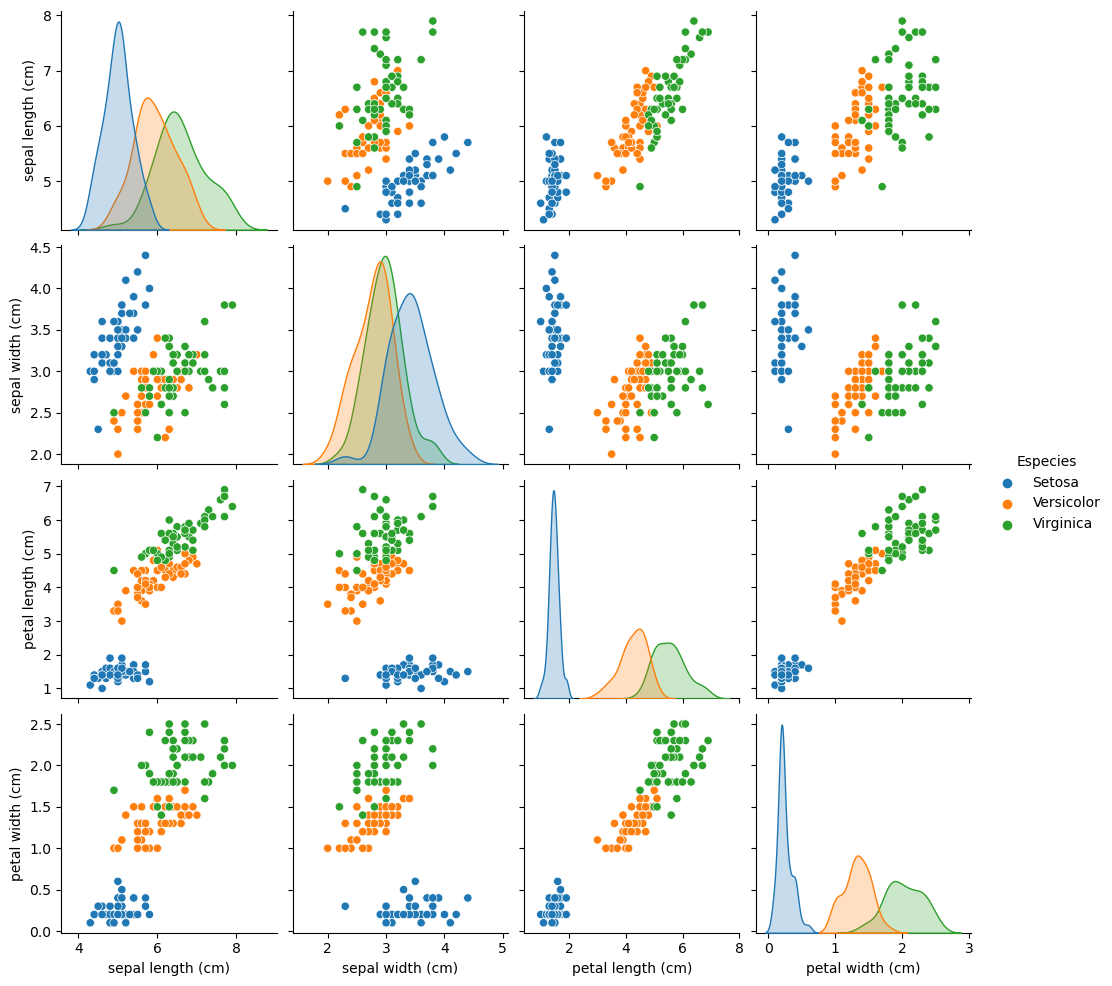

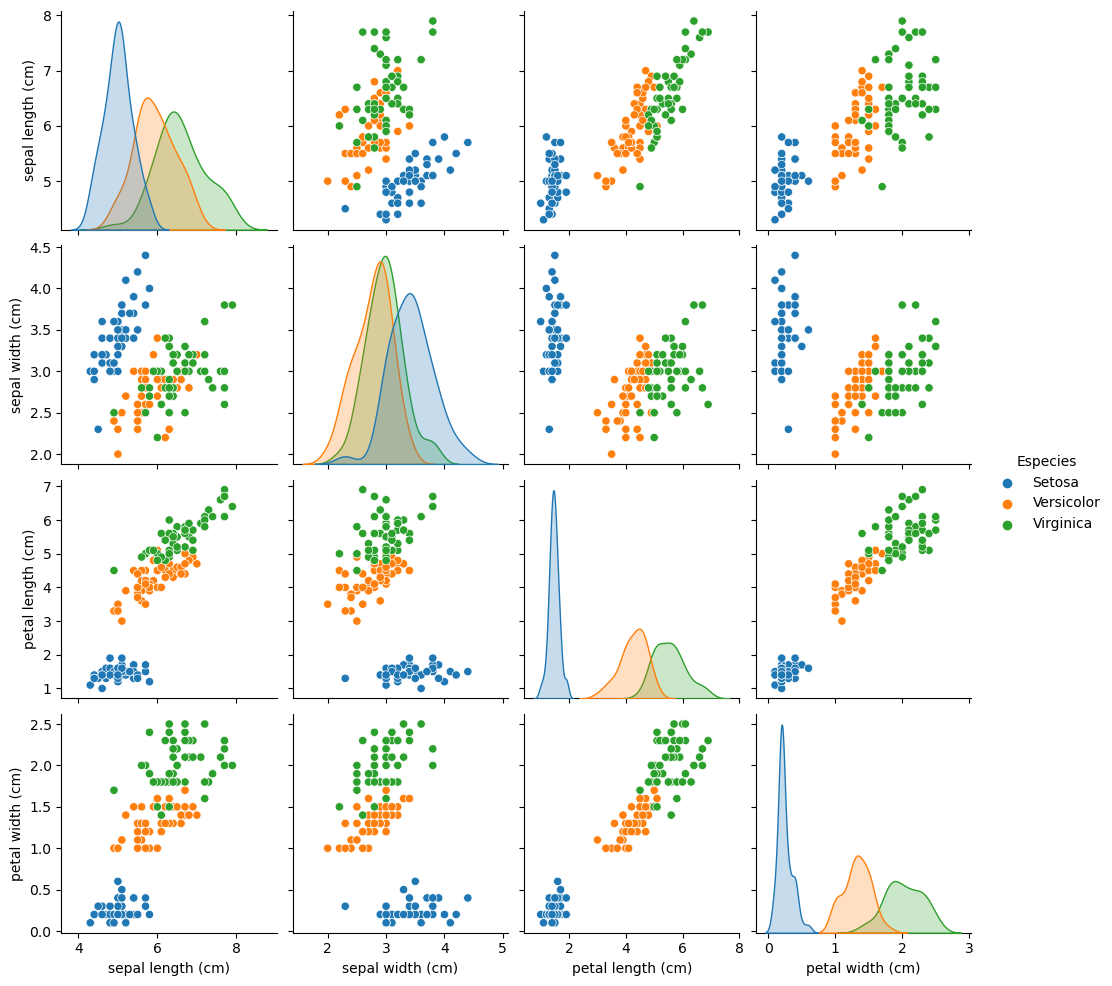

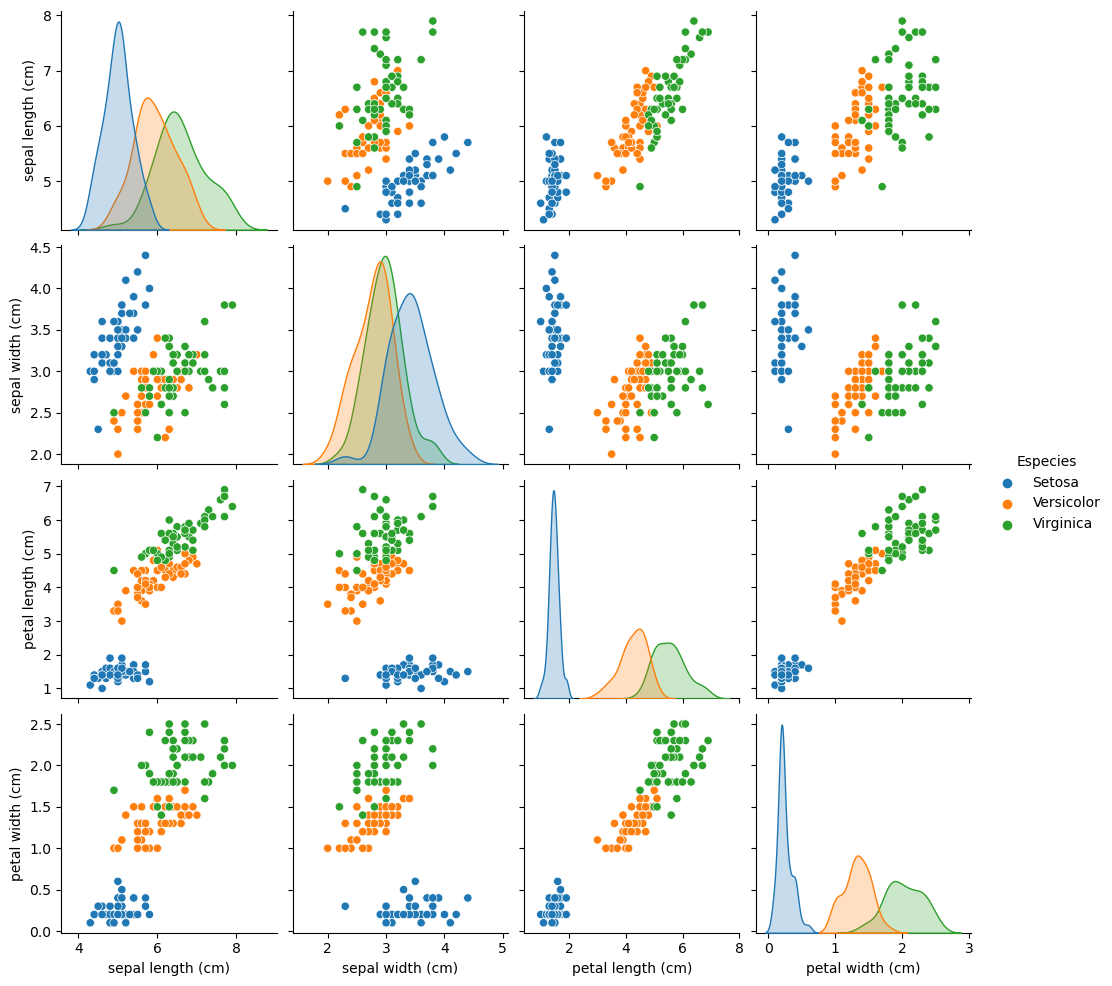

In [23]:
#Graficar los datos con seaborn:
spec = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
sns.pairplot(iris_df.replace({'Especies':spec}), hue='Especies')
plt.show()

Para el scope de este primer punto solo necesitaremos 2 características del DataFrame, se elegirán Virginica y Versicolor

In [ ]:
caract = ['petal length (cm)', 'petal width (cm)']
X = iris_df.loc[:, caract]
y = iris_df.loc[:, ['Especies']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Normalizar
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
K = int(input('Digite el número de vecinos que quiere calcular: '))
distancias_knn(X_train, X_test, K)

# Segundo punto

(10%) Desarrolle un algoritmo que cree dos vectores aleatorios de tamaño N (ingresado por el usuario),
donde todas sus posiciones sean de “0” o “1”. El algoritmo debe dar un resultado final que indique el
número de posiciones en el que fueron diferentes ambos vectores.

In [ ]:
hamming_funct() # --> Función guardada en el archivo main.py

# Tercer Punto

(60%) A partir de la base de datos Boston de Sklearn “data = datasets.load_boston()”

a. Describa como está compuesta la base de datos y para qué tipo de problema de los vistos en clase
(Clasificación y regresión) está diseñada.

b. Normalice los datos en caso de que lo considere necesario. Justifique

c. Hacer un análisis de las características por observación, graficando las variables con respecto target, con el fin de seleccionar únicamente 3 características para el algoritmo de machine a aplicar. (Explique su selección).

d. Aplique un algoritmo de cross-validation con el fin encontrar el mejor modelo para los datos, teniendo en cuenta lo anterior, guarde los modelos en cada interacción para que pueda reportar los parámetros del mejor modelo. Reporte la media de los scores obtenidos, el mejor modelo de los evaluados y los parámetros del mejor modelo (pesos y bias)

e. Varíe el número de Folds y grafique el promedio del score en cada una de las pruebas con respecto a estos. ¿Qué número de Folds es el más adecuado para esta aplicación?

f. ¿Cómo piensas que puede mejorar el rendimiento del modelo?

In [18]:
boston = datasets.load_boston()
print(boston.DESCR)
Boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
X=pd.DataFrame(boston['data'], columns=boston.feature_names)
Y=boston['target']
Labels = boston['target']
names = boston['feature_names']
Boston_df.head()
Boston_df.dtypes
Boston_df.info()
Boston_df.shape

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\gabca\anaconda3\envs\Laboratorio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

(506, 13)

La base de datos está compuesta por 506 muestras, con 13 atributos entre categóricos y numéricos, y el target que es el valor medio de la muestra.
Los atributos:

- CRIM: Porcentaje de crimen per capita en la ciudad.
- ZN: Proporción de las zonas residenciales ubicadas en lotes de más de 25000 pies cuadrados.
- INDUS: Proporción de acres (43560 pies cuadrados) relacionados a negocios no minoristas en la ciudad.
- CHAS: Variable Charles River Dummy, determina sí el domicilio en cuestión es cercano al río Charles River o no.
- NOX: Concentración de óxidos nítricos (smog y calidad del aire, expresado en partes por cada 10 millones)
- RM: Promedio de habitaciones por vivienda
- AGE: Proporción de ocupación de las viviendas por unidad desde 1940
- DIS: Distancias ponderadas hacía los 5 centros de empleo de Boston.
- RAD: Índice de accesibilidad a carreteras cercanas.
- TAX: Tasa de impuesto a la propiedad total por cada $10.000
- PTRATIO: Proporción estudiantes-maestro en la ciudad
- B: 1000(Bk-0.63)^2 dónde Bk es la proporción de personas de tez negra en la ciudad.
- LSTAT: Porcentaje de la población de estrato socioeconomic bajo.
- MEDV: Valor medio de casas ocupadas en miles de dólares.

Adicionalmente, la base de datos Boston reporta la no presencia de atributos perdidos o NaN-Null.

Aunque la base de datos Boston sea mayormente utilizada para regresión y predicción de valores de casas según la relación de sus características, también puede ser utilizada para la clasificación de residencias sí se agrupan los rangos de precios entre "Bajo Costo", "Medio Costo", "Alto Costo", todo dependiendo del scope u objetivo del estudio.

El diseño por defecto de la base de datos está estructurado para realizar una regresión lineal.